In [177]:
import os
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, push_notebook
from bokeh.models import HoverTool, CustomJS, Slider, ColumnDataSource
from bokeh.layouts import row, column, gridplot
import trackpy as tp
from scipy.optimize import curve_fit
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage import label

output_notebook()
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(50, 50))
mpl.rc('image', cmap='viridis')
plt.style.use('ggplot')
mpl.rc('xtick', labelsize=82)
mpl.rc('ytick', labelsize=82)
mpl.rcParams['font.size'] = 82

Loading BokehJS ...

In [178]:
file_dir = 'C:\\Users\\aquiles\\Data\\2018-07-11'
filenames = ['Capture 2018-07-11 14-03-26_AllTracks.csv',
            'Capture 2018-07-11 14-04-51_AllTracks.csv',
            'Capture 2018-07-11 14-06-16_AllTracks.csv',
            'Capture 2018-07-11 14-07-35_AllTracks.csv',
            'Capture 2018-07-11 14-08-56_AllTracks.csv']
description = '40nm' # For title of plot and saving the dataframe

In [179]:
all_data = pd.DataFrame({'Size': [], 'Included': []})
for filename in filenames:
    data = pd.read_csv(os.path.join(file_dir,filename))
    data.columns = ['Pcle', 'Size', 'D', 'Frame', 'X', 'Y', 'Intensity', 'Included', 'Extra']
    diff = data.groupby(by='Pcle',axis=0)['Size', 'Included', 'Intensity'].mean()
    all_data = pd.concat([all_data, diff], sort=True)
all_data['Included'] = all_data['Included'].astype(bool)
all_data.to_csv(os.path.join(file_dir, description + '.csv'))

[Text(0,0.5,'count'), Text(0.5,0,'Radius (nm)')]

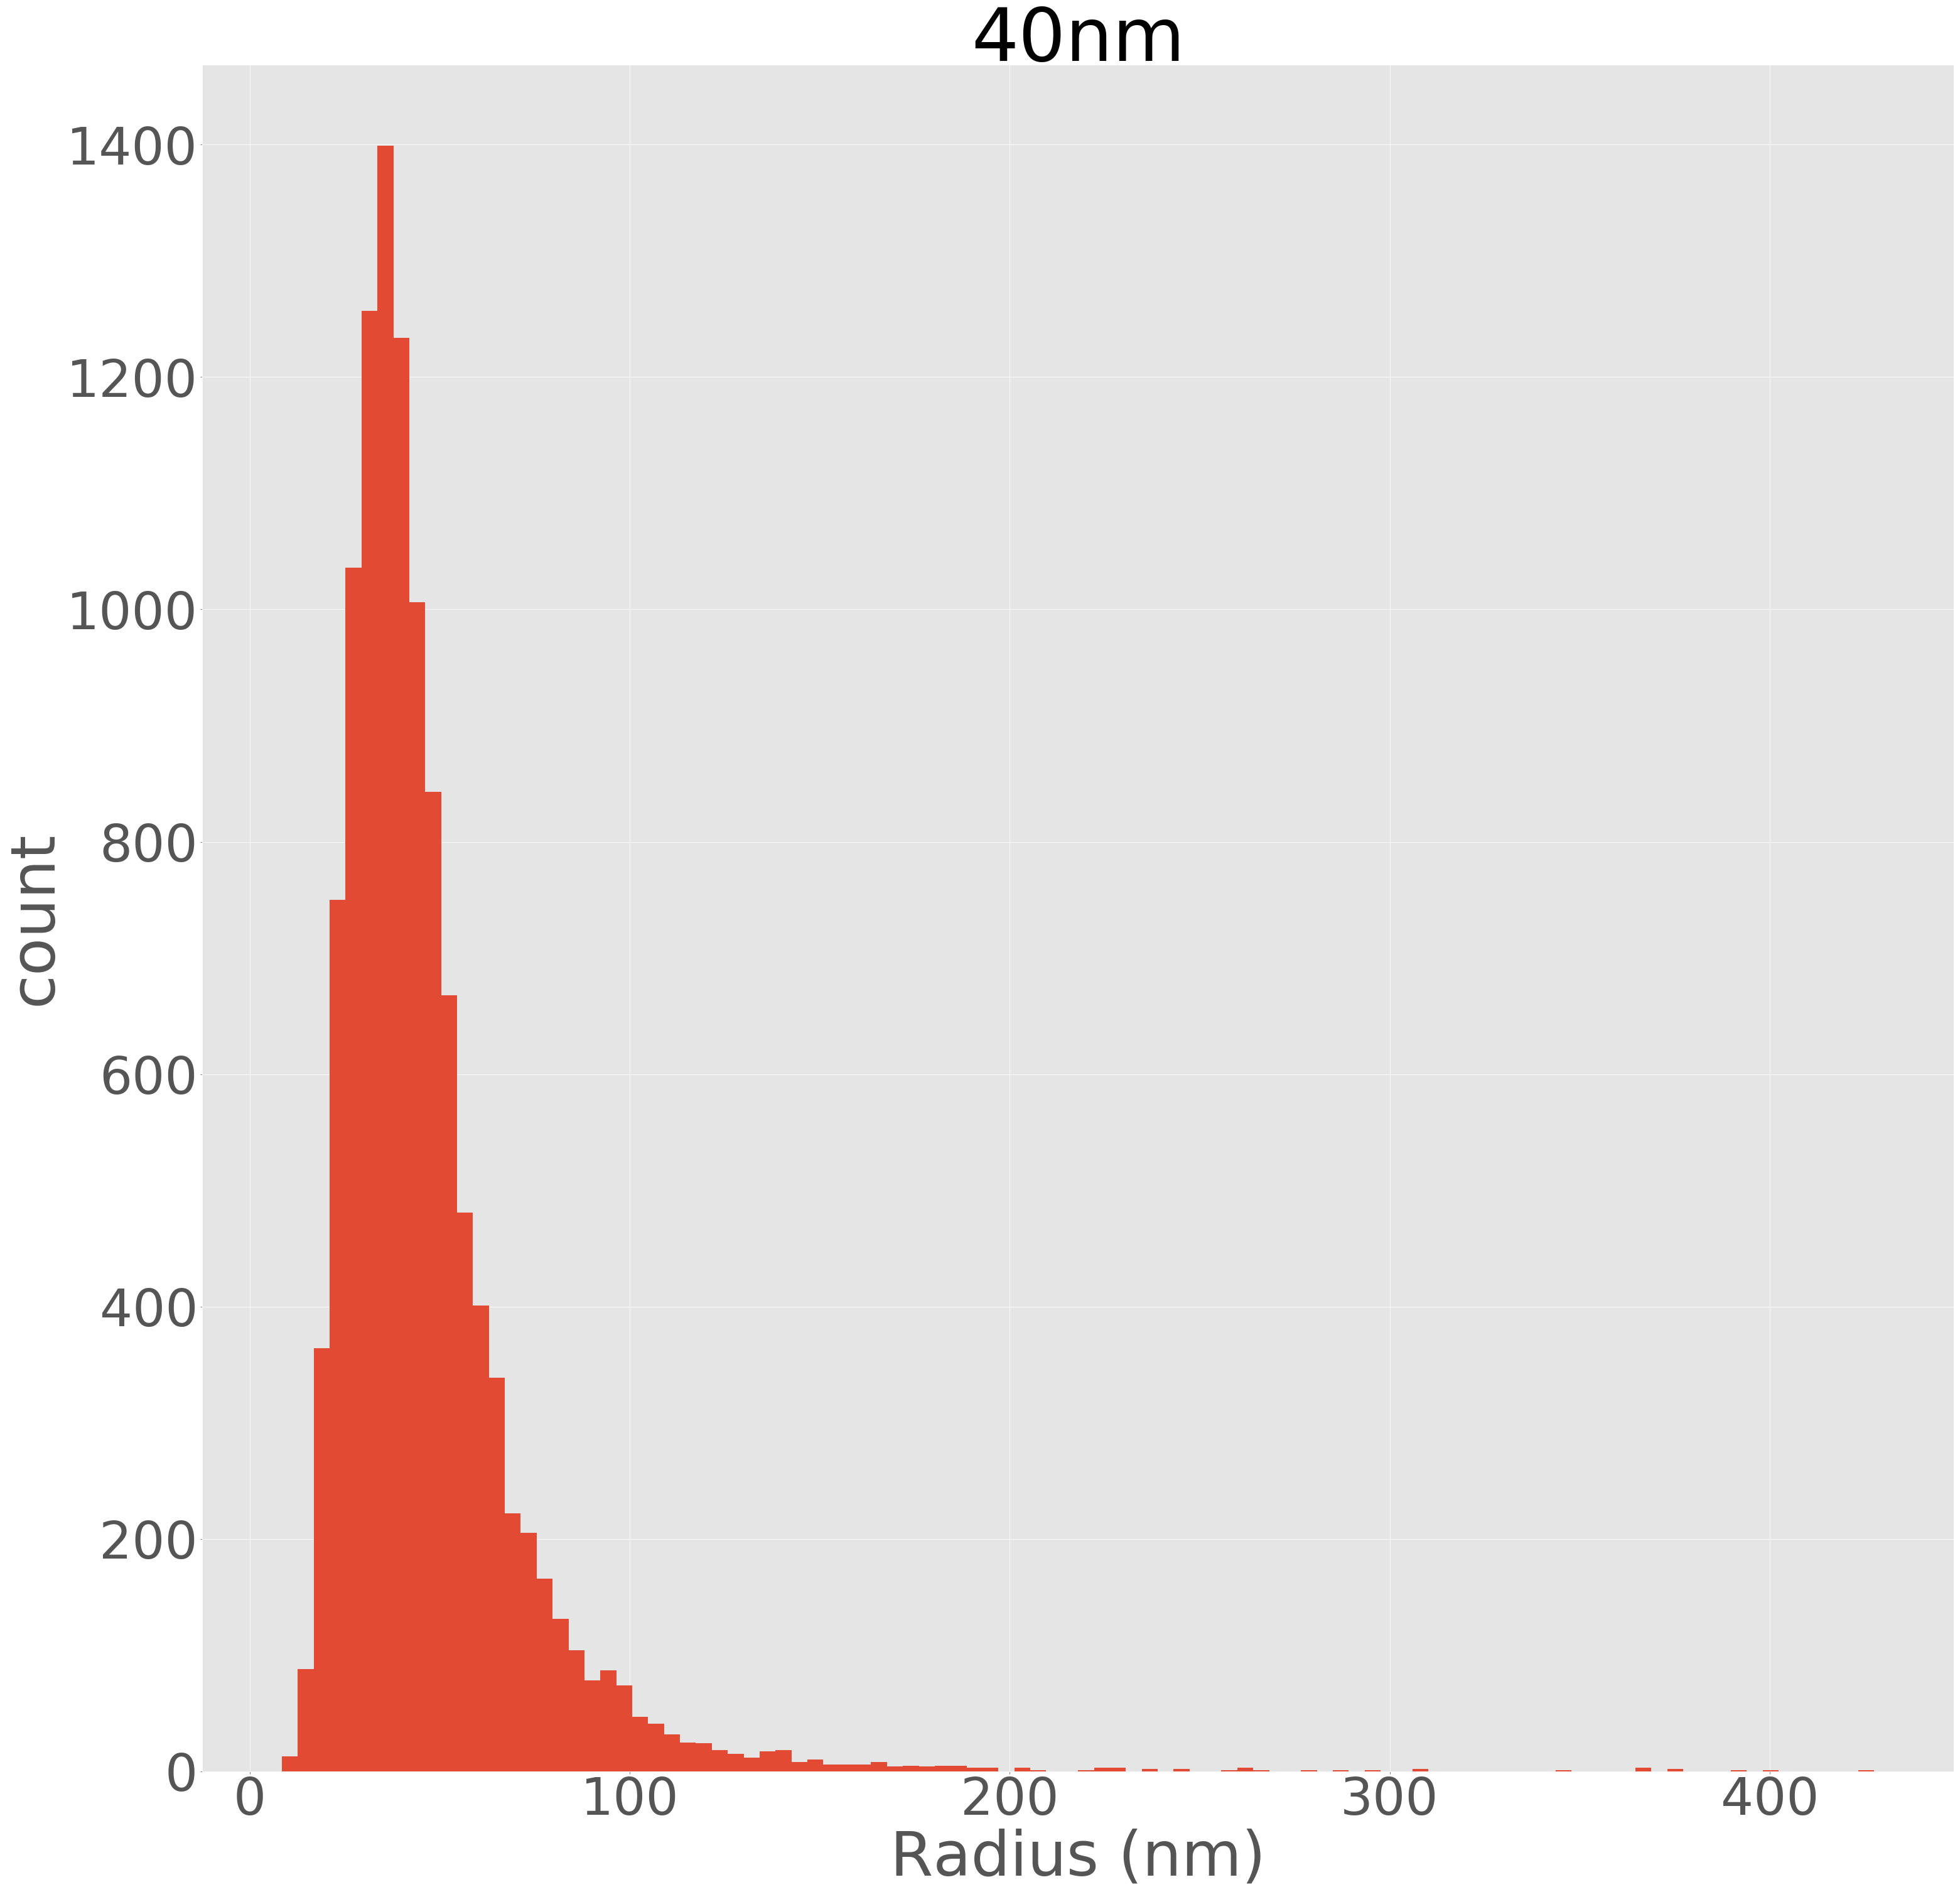

In [150]:
fig, ax = plt.subplots()
ax.hist(all_data[all_data['Included']]['Size'], bins=100)
# ax.plot(x_hist, hist_fit, 'r--', linewidth=1)
ax.set_title('40nm')
ax.set(xlabel='Radius (nm)', ylabel='count')

In [100]:
hist, edges = np.histogram(all_data[all_data['Included']]['Size'], density=False, bins=100)
bin_centres = (edges[:-1] + edges[1:])/2
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))
p0 = [0.035, 20., 10.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
x_hist = np.linspace(0, 160, 500)
hist_fit = gauss(x_hist, *coeff)

In [155]:
data_30 = pd.read_csv(os.path.join(file_dir, '30nm.csv'))
data_40 = pd.read_csv(os.path.join(file_dir, '40nm.csv'))
data_30_40 = pd.read_csv(os.path.join(file_dir, '30nm and 40nm.csv'))

(0, 150)

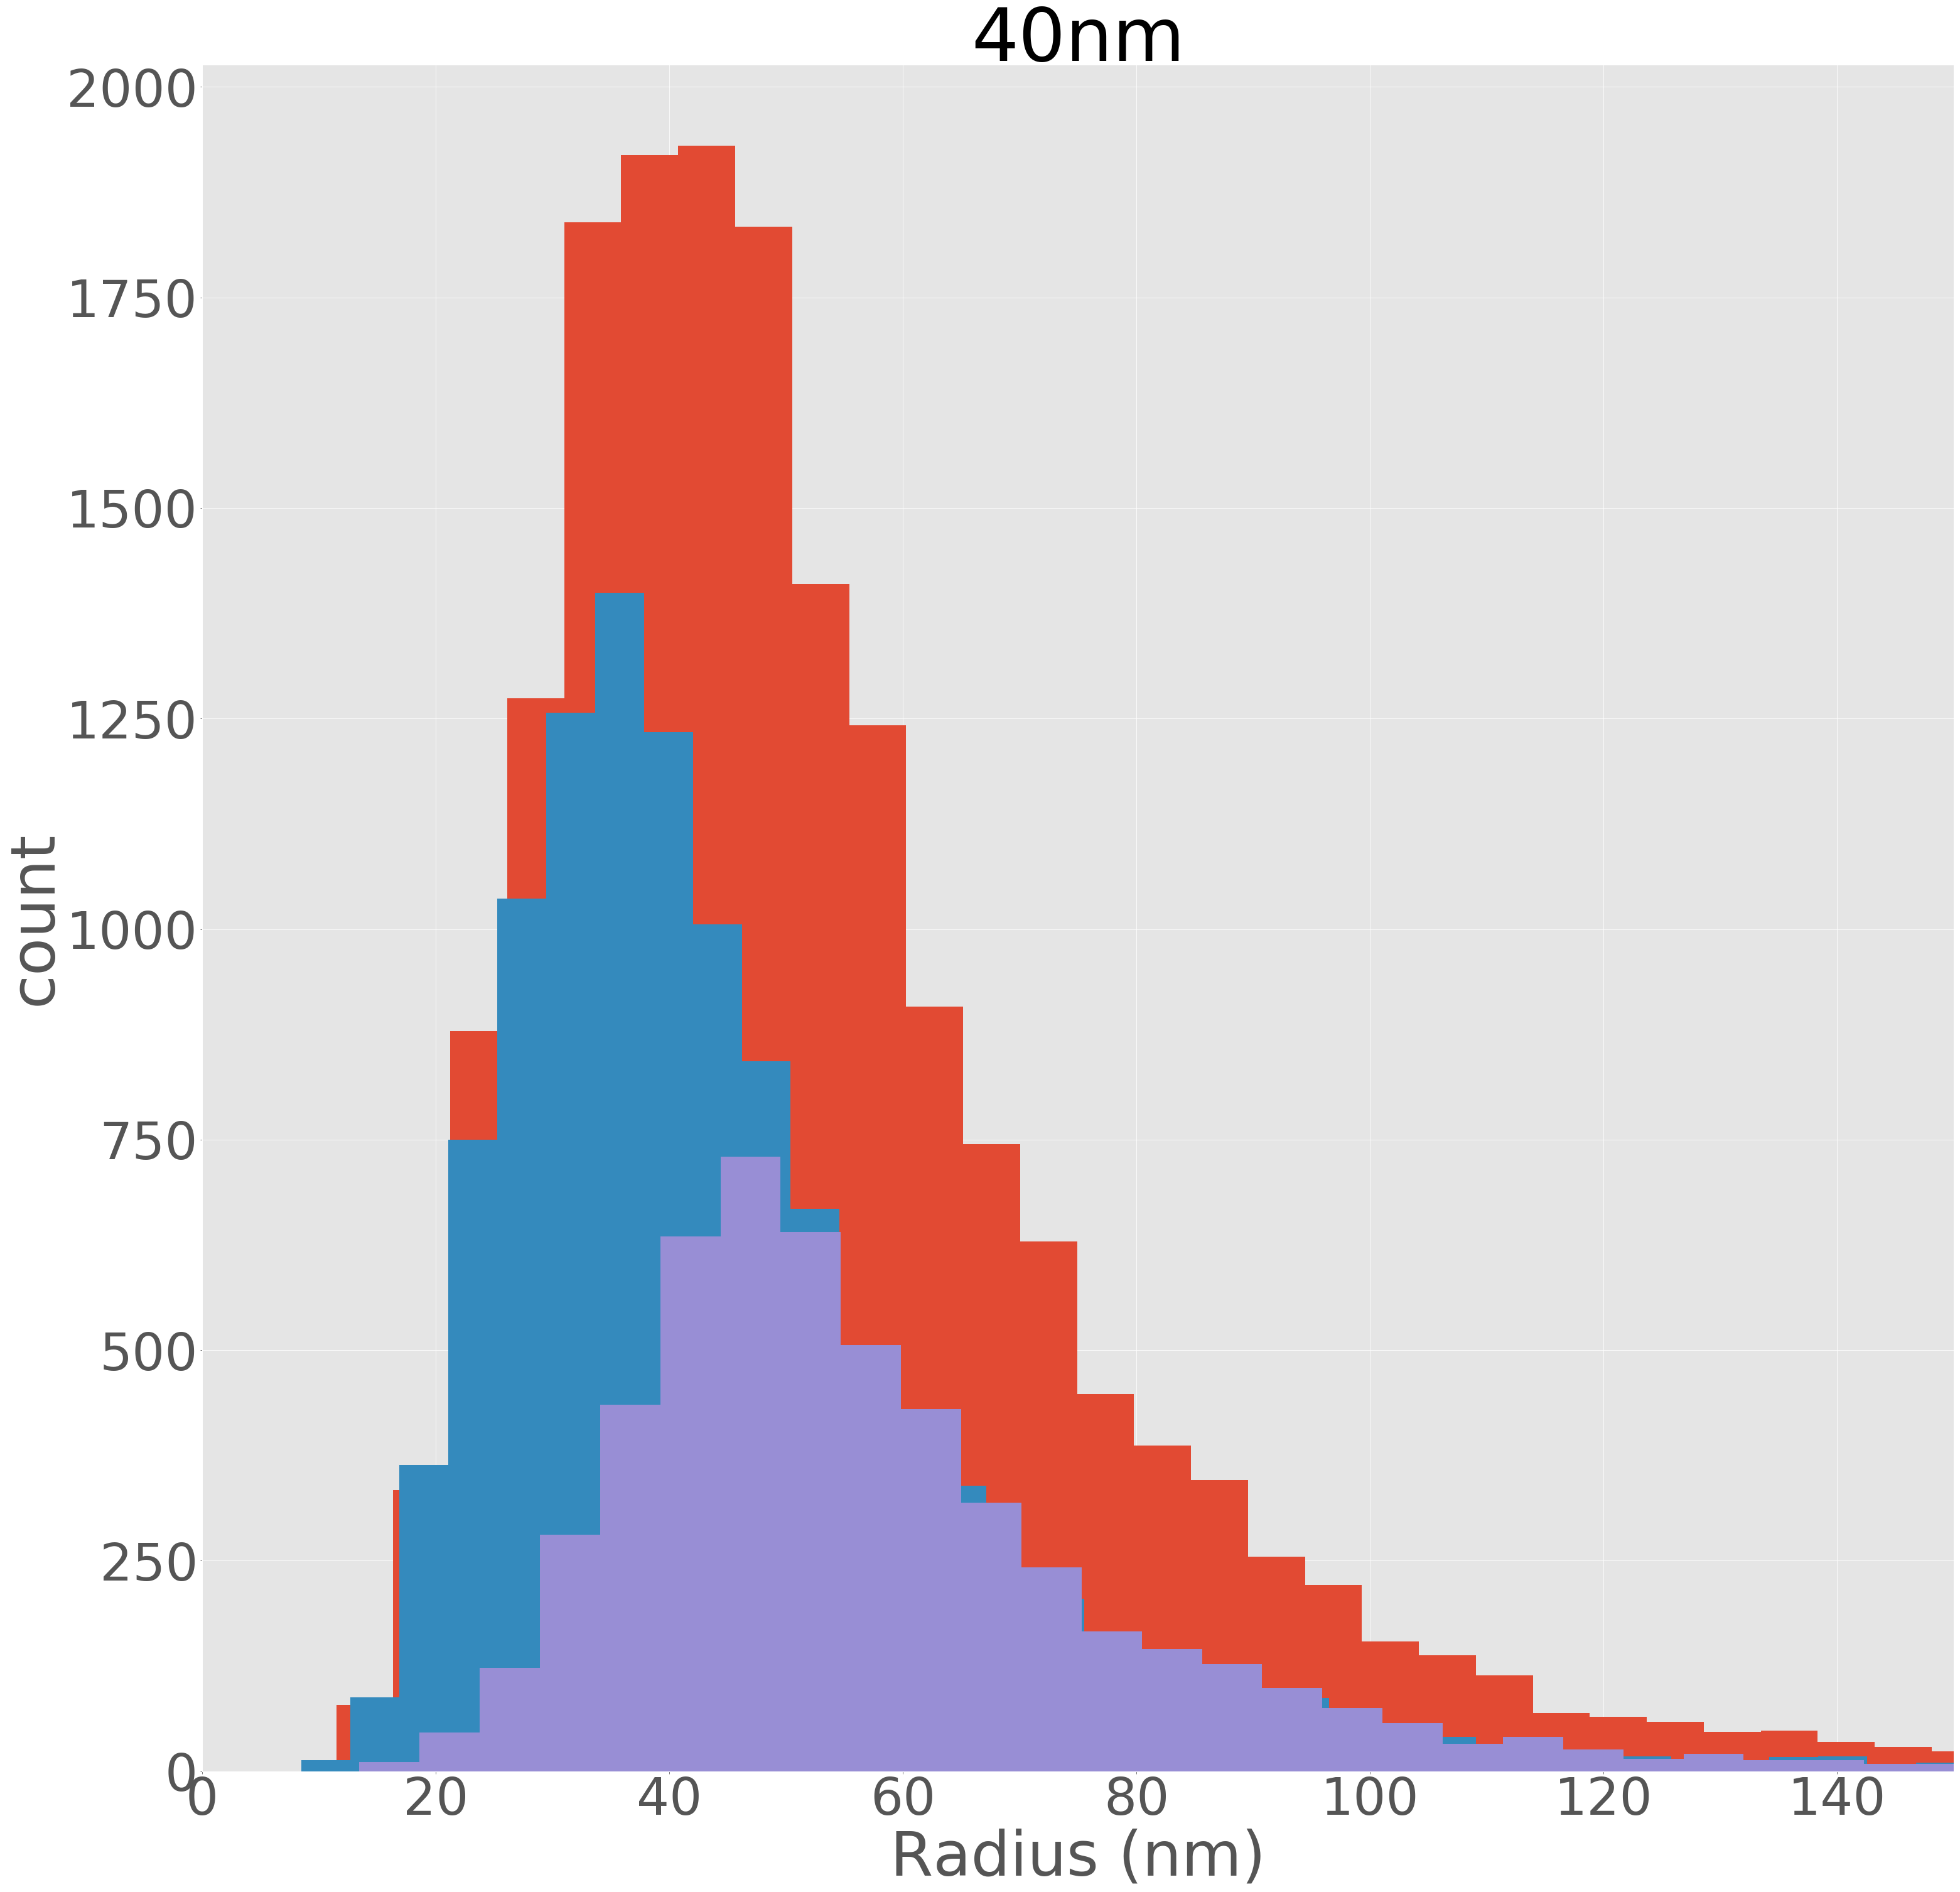

In [144]:
fig, ax = plt.subplots()
ax.hist(data_30_40[data_30_40['Included']]['Size'], bins=100)
ax.hist(data_30[data_30['Included']]['Size'], bins=100)
ax.hist(data_40[data_40['Included']]['Size'], bins=100)

# ax.plot(x_hist, hist_fit, 'r--', linewidth=1)
ax.set_title('40nm')
ax.set(xlabel='Radius (nm)', ylabel='count')
ax.set_xlim(0,150)
# ax.legend(('30nm and 40nm', '30nm', '40nm'))

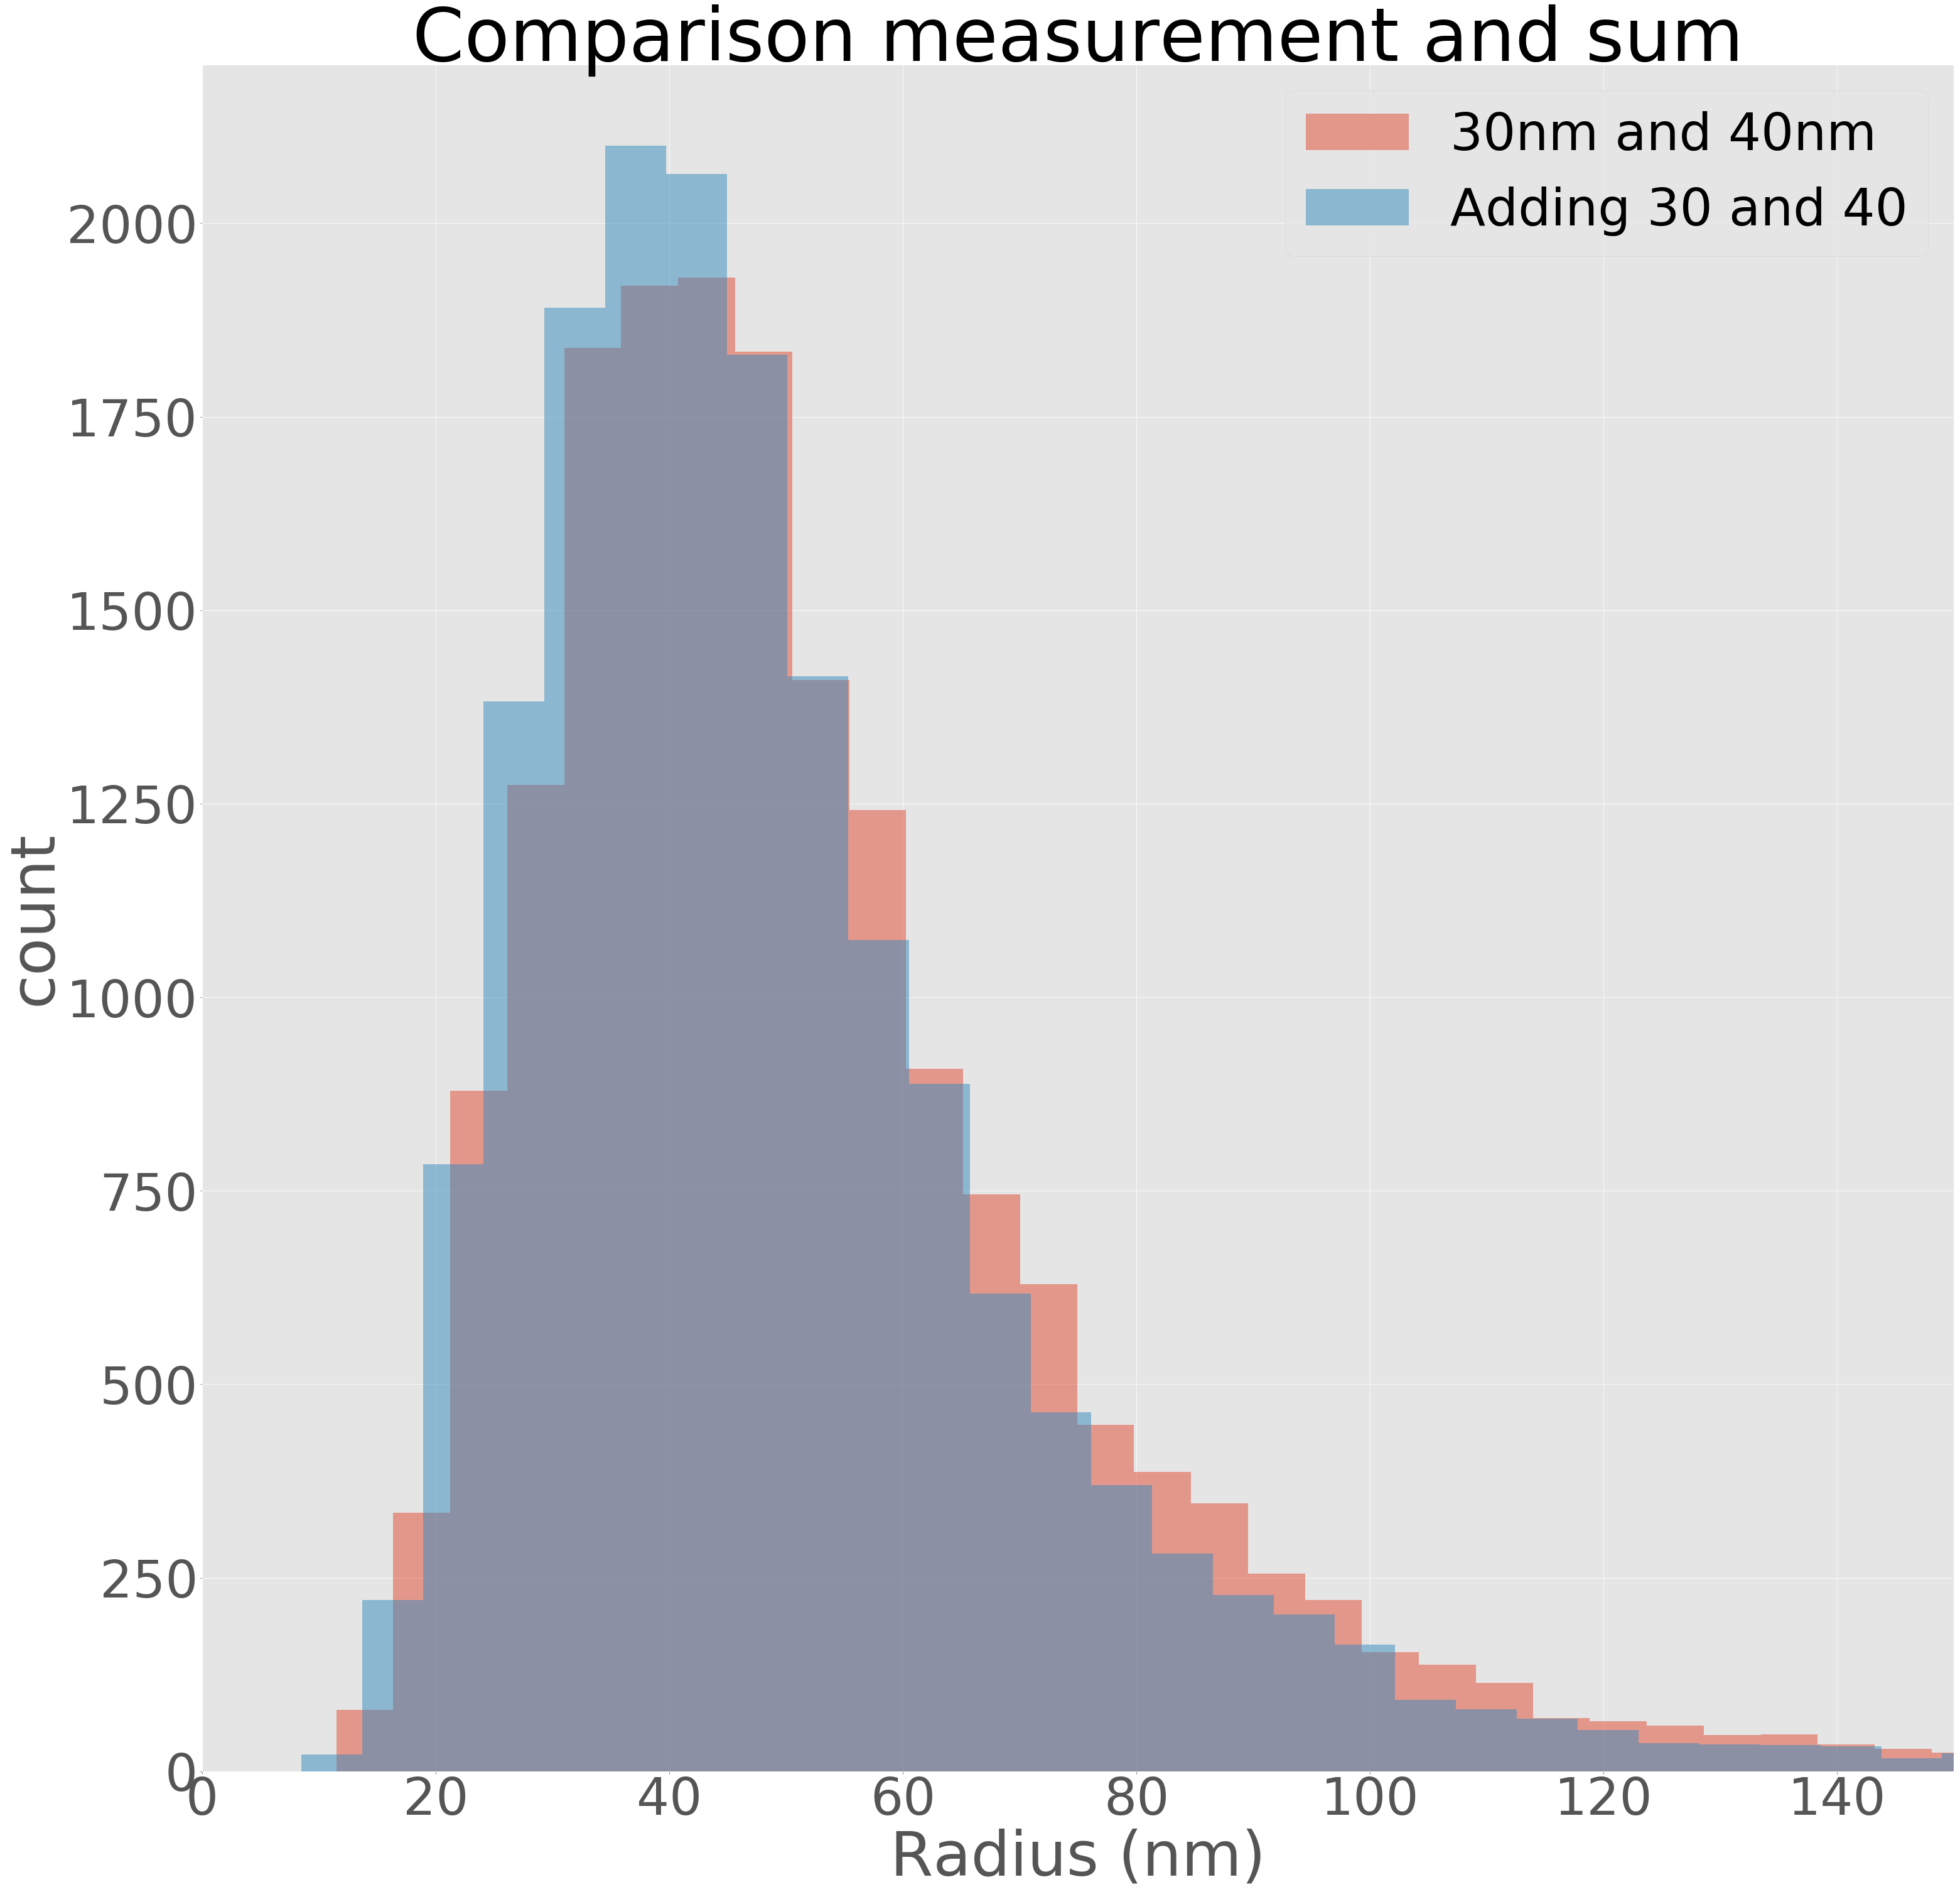

In [145]:
fig, ax = plt.subplots()
data_30_40_sum = data_30[data_30['Included']]['Size'].append(data_40[data_40['Included']]['Size'])
ax.hist(data_30_40[data_30_40['Included']]['Size'], bins=100, alpha=0.5)
ax.hist(data_30_40_sum, bins=100, alpha=0.5)

ax.set_title('Comparison measurement and sum')
ax.set(xlabel='Radius (nm)', ylabel='count')
ax.set_xlim(0,150)
ax.legend(('30nm and 40nm', 'Adding 30 and 40'))

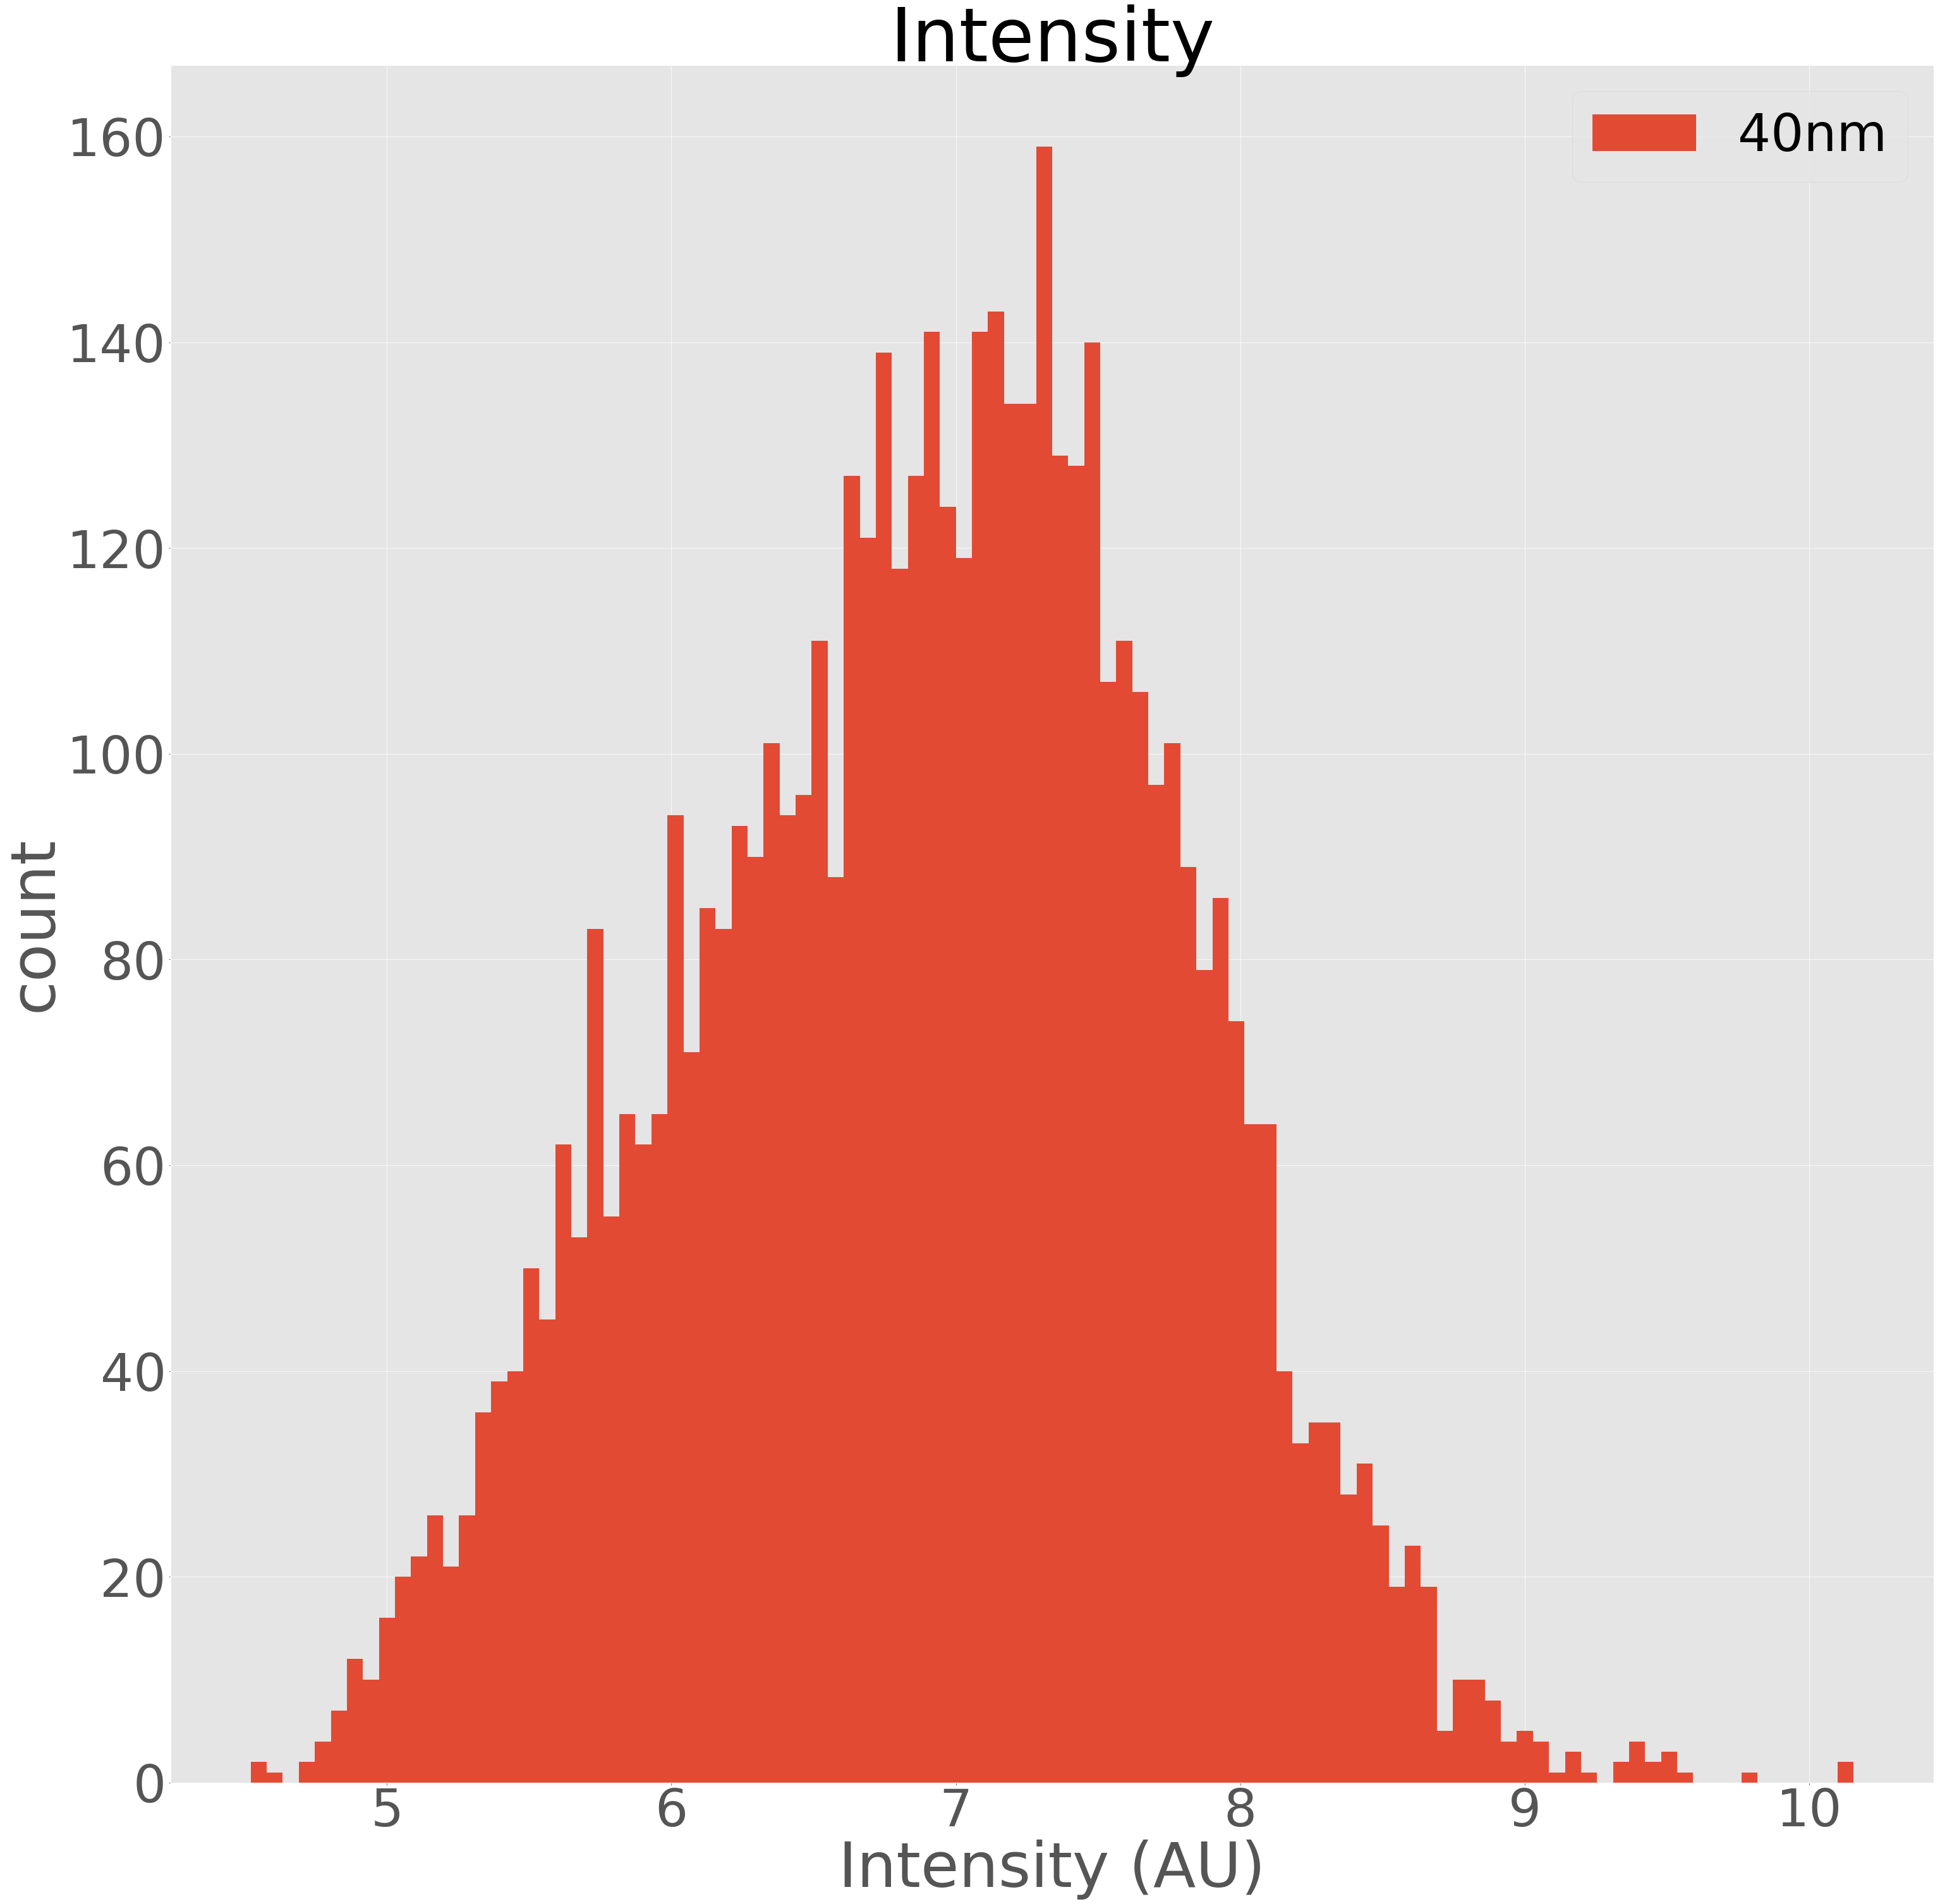

In [165]:
fig, ax = plt.subplots()
# ax.hist(data_30_40[data_30_40['Included']]['Intensity'], bins=100)
# ax.hist(data_30[data_30['Included']]['Intensity'], bins=100)
ax.hist(data_40[data_40['Included']]['Intensity'], bins=100)

# ax.plot(x_hist, hist_fit, 'r--', linewidth=1)
ax.set_title('Intensity')
ax.set(xlabel='Intensity (AU)', ylabel='count')
# ax.set_xlim(0,150)
ax.legend({'40nm'})

[Text(0,0.5,'Intensity (AU)'), Text(0.5,0,'Size (nm)')]

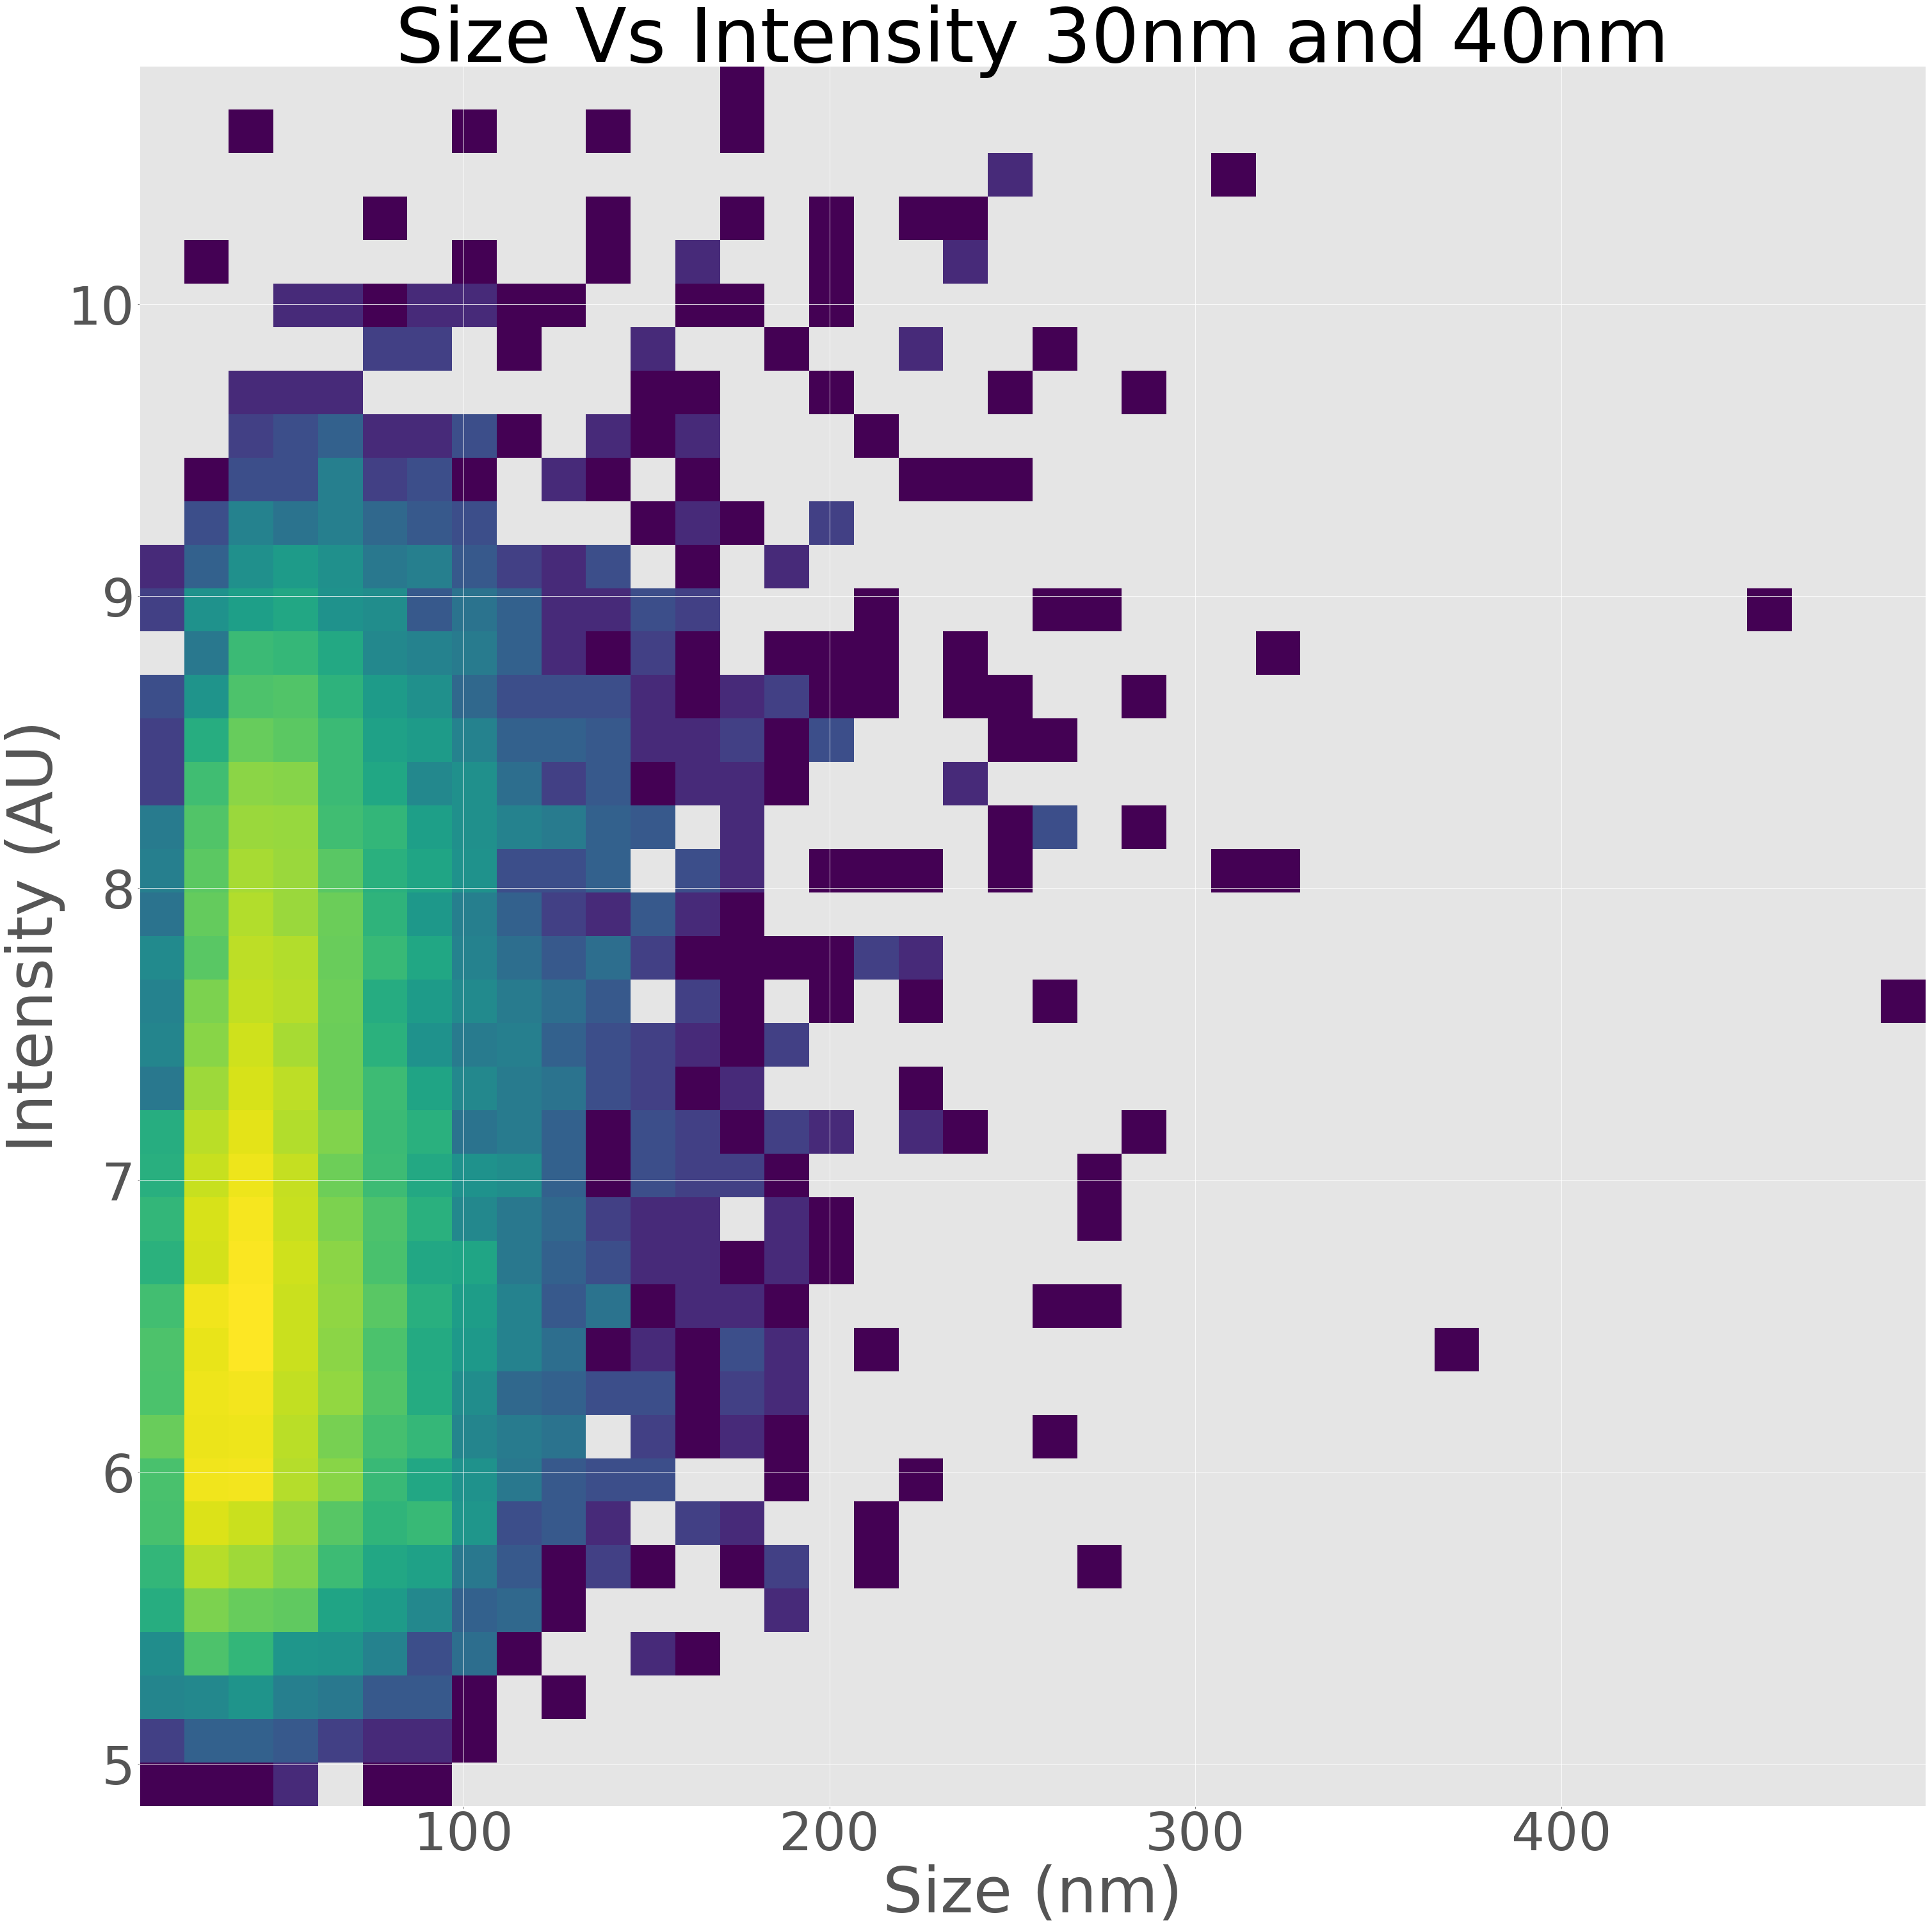

In [176]:
fig, ax = plt.subplots()
ax.set_title('Size Vs Intensity 30nm and 40nm')
ax.hist2d(data_30_40[data_30_40['Included']]['Size'], data_30_40[data_30_40['Included']]['Intensity'], bins=40, norm=LogNorm())
ax.set(xlabel='Size (nm)', ylabel='Intensity (AU)')

In [208]:
new_data = data['Y'].apply(lambda x: x%1)

[Text(0,0.5,'Count'),
 Text(0.5,0,'Decimal part'),
 Text(0.5,1,'Distribution of decimal parts in Y')]

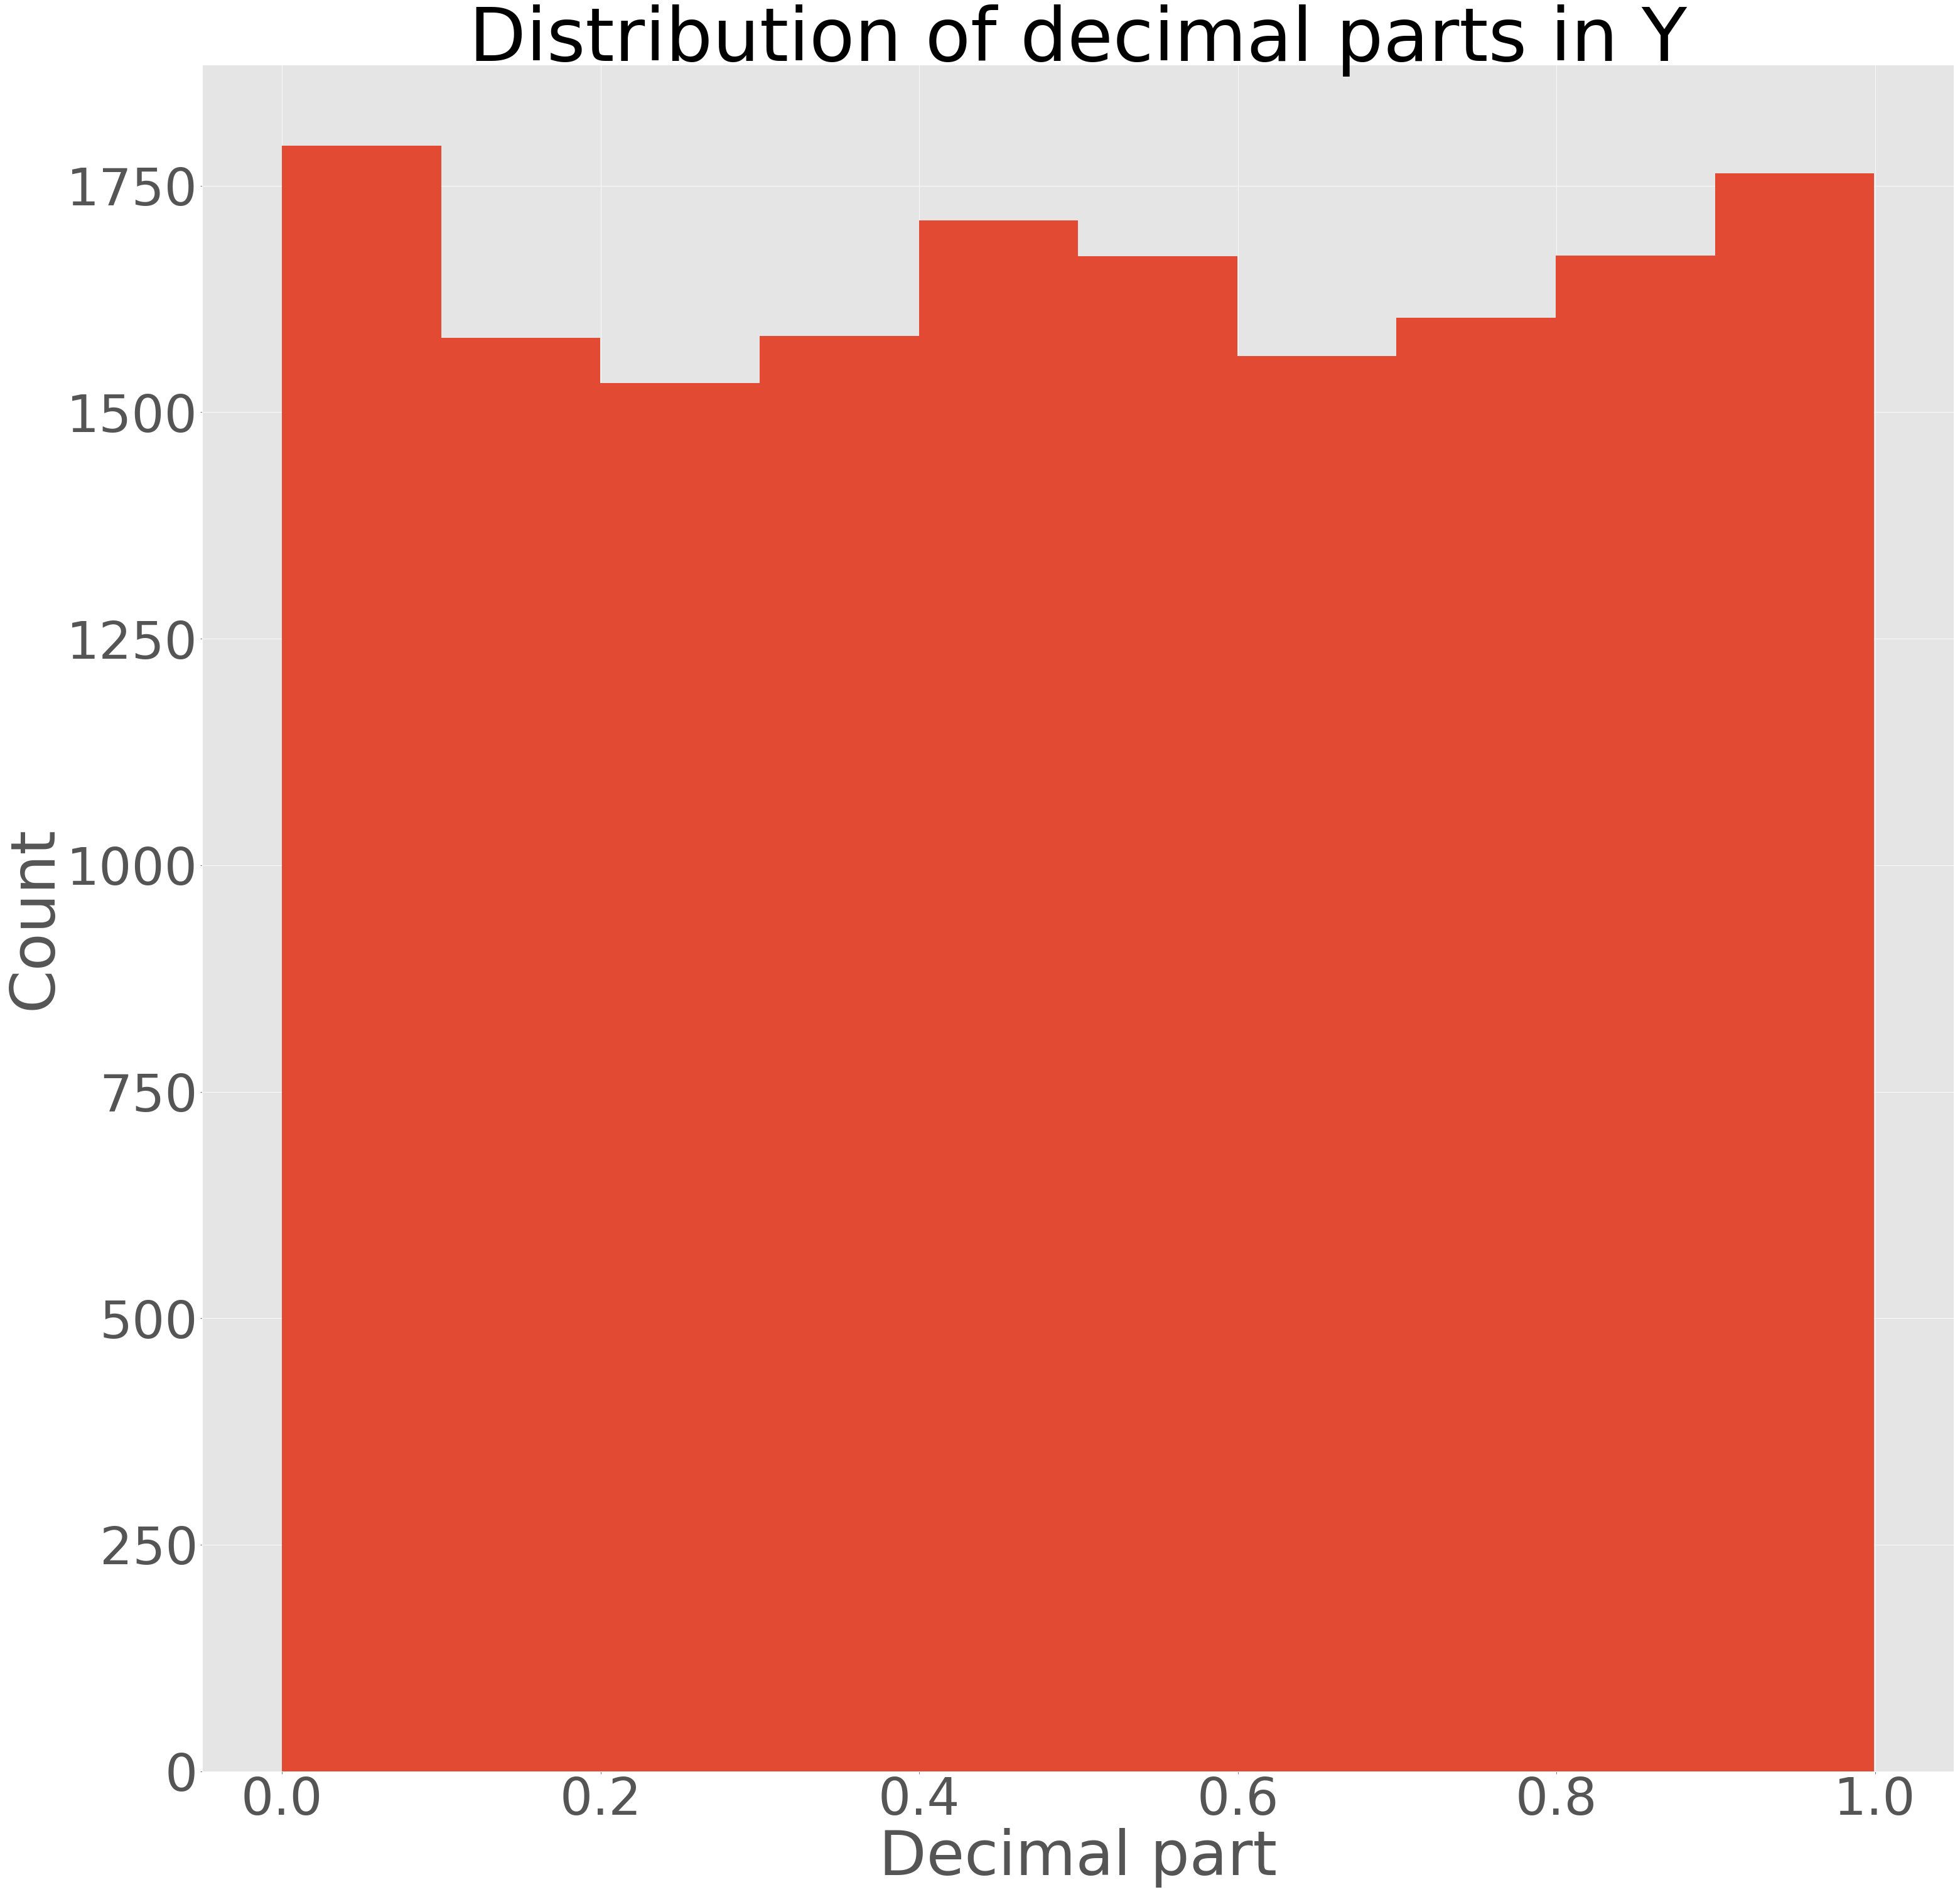

In [209]:
fig = new_data.hist()
fig.set(xlabel='Decimal part', ylabel='Count', title='Distribution of decimal parts in Y')

[Text(0.5,3.2,'Decimal part')]